In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
class Dot:
    def __init__(self,x,y,name):
        self.x = x
        self.y = y
        self.name = name
    
    def __str__(self):
        return f'{self.name}({self.x}, {self.y})'
    
    def __eq__(self, other):
        return (self.x == other.x) and (self.y == other.y)


class Segment:
    def __init__(self,p1,p2):
        self.p1=p1
        self.p2=p2
        self.dots = []
    
    def __eq__(self, other):
        return ((self.p1 == other.p1 and self.p2 == other.p2) or 
                (self.p1 == other.p2 and self.p2 == other.p1))

    def getX(self):
        X = [self.p1.x,self.p2.x]
        return X

    def get_equation_koef(self):
        if(self.p1.x==self.p2.x):
            return None, self.p1.x
        else:
            k = (self.p2.y-self.p1.y)/(self.p2.x-self.p1.x)
            b = (self.p2.x*self.p1.y-self.p1.x*self.p2.y)/(self.p2.x-self.p1.x)
            return k,b

    def __str__(self):
        return f"[{self.p1}; {self.p2}]"

    def getY(self):
        Y = [self.p1.y,self.p2.y]
        return Y

    def is_on(self,x1,y1):
        x_in = min(self.p1.x, self.p2.x) - 0.01 < x1 < max(self.p1.x,self.p2.x)+0.01  
        y_in = min(self.p1.y, self.p2.y) - 0.01< y1 < max(self.p1.y,self.p2.y)+0.01
        
        if x_in and y_in: return True
        return False

    def adddots(self,d):
        self.dots.append(d)
    
    def sortd(self,P):
        n = len(self.dots)
        for i in range(n-1): 
            for j in range(0, n-i-1): 
                if find_range(self.dots[j],P) >  find_range(self.dots[j+1],P) : 
                    self.dots[j], self.dots[j+1] = self.dots[j+1], self.dots[j] 
    
def find_range(d1,d2):
    return ((d1.x-d2.x)**2+(d1.y-d2.y)**2)**(1/2)

    
def sort_by_angle(dots, P):
    get_angle = lambda d: round(math.atan2(d.y - P.y, d.x - P.x)*180/math.pi) % 360
    dots_angles = list(zip(list(map(get_angle, dots)), dots))
    dots_sorted = [d for _, d in sorted(dots_angles, key=lambda dot: dot[0])]

    return dots_sorted


    

    

In [3]:
#Точки мають буть відсортованими по x координаті за зростанням, якщо x однакові сортуються по y за зростанням
def set_segments(points):
        segments = []
        n = len(points)
        for i in range(n):
            seg = Segment(points[i], points[(i+1) % n])
            segments.append(seg)
        
        return segments

J = Dot(3,2,'J')
N = Dot(5,5,"N")
M = Dot(2,6,'M')
K  = Dot(6,9,"K")
C = Dot(3,11,"C")
F = Dot(10,11 ,'F')
D = Dot(7,13, 'D')
I = Dot(10,14,"I")
Y = Dot(11,9.5,"Y")
H= Dot(7.5,9,"H")
A=Dot(9,7.5,"A")
AA=Dot(12,8,"AA")
B=Dot(15,11,"B")
BB=Dot(19,8,"BB")
CC = Dot(13,5,"CC")
Q = Dot(18,3,"Q")
QQ = Dot(11,1,"QQ")



P = Dot(13,19,"P")

dots = [J,N,C,D,F,M,K,Y,I,H,A,AA,B,BB,CC,Q,QQ]
dots = sort_by_angle(dots,P)

In [4]:
# figure = plt.figure(figsize=(10, 10))
# ax = figure.add_subplot(111)

# for i in segments:
#     ax.plot(i.getX(), i.getY(),c='k')
# for p in dots:
#     ax.scatter(p.x, p.y, c='r')
#     ax.text(p.x+0.08, p.y+0.15, p.name)

# ax.set_xlim((0,18))
# ax.set_ylim((0,18))

In [5]:
xmin = dots[0].x
ymin =dots[0].y
xmax = dots[0].x
ymax =dots[0].y

for i in dots:
    if xmin>i.x:
        xmin = i.x
    if ymin>i.y:
        ymin=i.y

    if xmax<i.x:
        xmax = i.x
    if ymax<i.y:
        ymax=i.y


if xmin>P.x:
    xmin = P.x
if ymin>P.y:
    ymin=P.y

if xmax<P.x:
    xmax = P.x
if ymax<P.y:
    ymax=P.y

In [6]:


s1 = Segment(J,N)
s2 = Segment(N,M)
s3 = Segment(M,K)
s4 = Segment(K,C)
s5 = Segment(C,F)
s6 = Segment(F,D)
s7 = Segment(D,I)
s8 = Segment(I,Y)
s9 = Segment(Y,H)
s10 = Segment(H,A)
s11 = Segment(A,AA)
s12 = Segment(AA,B)
s13 = Segment(B,BB)
s14 = Segment(BB,CC)
s15 = Segment(CC,Q)
s16 = Segment(Q,QQ)
s17 = Segment(QQ,J)
segments = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17]




In [7]:

tmpseg = []
for i in dots:
    seg = Segment(i,P)
    tmpseg.append(seg)

In [8]:

tmp_dots = []
for i in tmpseg:
    k1, b1 = i.get_equation_koef()

    for j in segments:
        k2, b2 = j.get_equation_koef()

        if k1 == k2: continue
        if k1 is None:
            x1 = b1
            y1 = k2*b1 + b2
        elif k2 is None:
            x1 = j.p1.x
            y1 = k1*x1 + b1
        else:
            x1 = (b2-b1)/(k1-k2)
            y1 = k1*x1 + b1

        d1 = Dot(round(x1,4), round(y1,4), '')
        if round(x1, 4) in [j.p1.x, j.p2.x] and round(y1, 4) in [j.p1.y, j.p2.y]: continue
        elif j.is_on(d1.x,d1.y):
            # for k in range(len(i.dots)):
            #     if i.dots[k].x==d1.x and i.dots[k].y==d1.y :continue
            i.adddots(d1)
            j.adddots(d1)
            tmp_dots.append(d1)


invisible = []
for j in segments:
    tmp = j.p1
    for k in range(len(j.dots)):
        invisible.append(Segment(tmp,j.dots[k]))
        tmp = j.dots[k]
    invisible.append(Segment(tmp,j.p2))


In [9]:
# def checkline(prev,new,segment):
#     ns = Segment(prev,new)
#     k2,b2 = ns.get_equation_koef()
#     for i in segment:
#         k1,b1 = i.get_equation_koef()

#         if round(k2,4)==k1 and round(b2,4)==b1:
#             if(i.is_on(prev.x,prev.y)and i.is_on(new.x,new.y)):
#                 return True

#     return False

prev = []
visible = []
for i in tmpseg:
    i.sortd(P)
    vertig = i.p1
    if not i.dots:
        if not prev:
            prev = [vertig]
        else:
            print(vertig)
            print(prev[0])
            if Segment(prev[0],vertig) in invisible:
                visible.append(Segment(prev[0],vertig))
                invisible.remove(Segment(prev[0],vertig))
            prev = [vertig]


    elif (find_range(i.dots[0],P) < find_range(vertig,P)):
        if not prev:
            prev = [i.dots[0], vertig] + i.dots[1:]      

        else:
            if Segment(prev[0],i.dots[0]) in invisible:
                visible.append(Segment(prev[0], i.dots[0]))
                invisible.remove(Segment(prev[0], i.dots[0]))

            else:
                if len(prev)>1:
                    if Segment(prev[1],i.dots[0]) in invisible:
                        visible.append(Segment(prev[1], i.dots[0]))
                        invisible.remove(Segment(prev[1], i.dots[0]))
                        
            prev = [i.dots[0], vertig] + i.dots[1:]            
            

        
    elif (find_range(i.dots[0],P) > find_range(vertig,P)):
        if not prev:
           prev = [vertig]
        else:
            if Segment(prev[0],vertig) in invisible:
                visible.append(Segment(prev[0],vertig))
                invisible.remove(Segment(prev[0],vertig))
            elif Segment(prev[0],i.dots[0]) in invisible:
                    visible.append(Segment(prev[0],i.dots[0]))
                    invisible.remove(Segment(prev[0],i.dots[0]))
            
            else:
                if len(prev)>1:
                    if Segment(prev[1],vertig) in invisible:
                        visible.append(Segment(prev[1], vertig))
                        invisible.remove(Segment(prev[1], vertig))
                        
            prev = [vertig] + i.dots




print(*visible)
print(*invisible)


BB(19, 8)
(15.6531, 10.5102)
[C(3, 11); (5.0, 11.0)] [D(7, 13); (8.2857, 13.4286)] [(8.2857, 13.4286); (9.3478, 13.7826)] [(9.3478, 13.7826); I(10, 14)] [I(10, 14); (10.0161, 13.9274)] [(10.0161, 13.9274); (10.04, 13.82)] [(10.04, 13.82); (10.0719, 13.6763)] [(10.0719, 13.6763); (10.4186, 12.1163)] [(10.4186, 12.1163); (10.4915, 11.7881)] [(10.4915, 11.7881); Y(11, 9.5)] [(10.6364, 7.7727); (11.7736, 7.9623)] [(11.7736, 7.9623); AA(12, 8)] [AA(12, 8); (13, 9.0)] [(13, 9.0); B(15, 11)] [B(15, 11); (15.6531, 10.5102)] [(15.6531, 10.5102); BB(19, 8)]
[J(3, 2); N(5, 5)] [N(5, 5); (3.5405, 5.4865)] [(3.5405, 5.4865); (4.6667, 5.1111)] [(4.6667, 5.1111); (4.8033, 5.0656)] [(4.8033, 5.0656); M(2, 6)] [M(2, 6); K(6, 9)] [K(6, 9); (4.2, 10.2)] [(4.2, 10.2); (5.0656, 9.623)] [(5.0656, 9.623); C(3, 11)] [(5.0, 11.0); (6.2308, 11.0)] [(6.2308, 11.0); (7.4, 11.0)] [(7.4, 11.0); (8.2, 11.0)] [(8.2, 11.0); (8.2941, 11.0)] [(8.2941, 11.0); (8.4286, 11.0)] [(8.4286, 11.0); (8.6, 11.0)] [(8.6, 11.0); F(

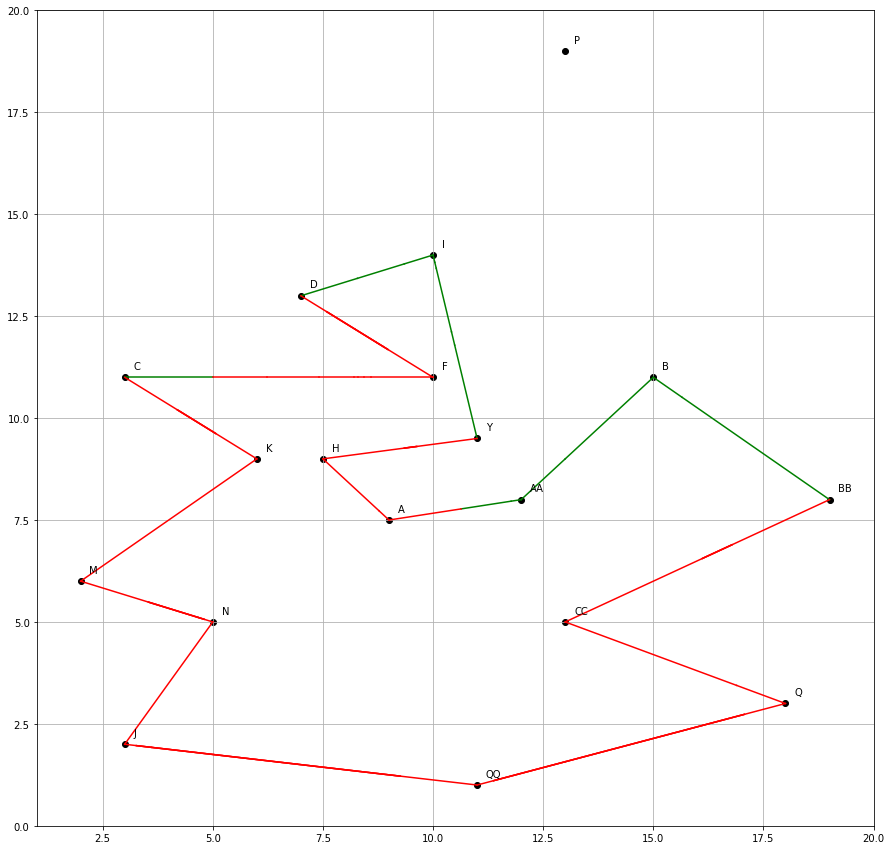

In [10]:



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.set_xlim(xmin-1,xmax+1)
ax.set_ylim(ymin-1,ymax+1)
for i in dots:
    ax.scatter(i.x,i.y,c ='k')
    ax.text(i.x+0.2,i.y+0.2,i.name)
ax.scatter(P.x,P.y,c ='k')
ax.text(P.x+0.2,P.y+0.2,P.name)
ax.grid()


# for i in tmpseg:
#     if (i.getX()[1]- i.getX()[0]) == 0:
#         y = np.linspace(ymin,ymax, 100)
#         ax.plot([i.getX()[0]]*100, y, c="k")
#     else:
#         k1 = (i.getY()[1]- i.getY()[0])/(i.getX()[1]- i.getX()[0])
#         b1 = (i.getY()[0]*i.getX()[1]- i.getY()[1]*i.getX()[0])/(i.getX()[1]- i.getX()[0])
#         x= np.linspace(xmin, xmax)
#         ax.plot(x,k1*x+b1,c="k")


# for i in tmp_dots:
#     ax.scatter(i.x,i.y,c ='b')  

for i in visible:
    ax.plot(i.getX(),i.getY(),c='g')

for i in invisible:
    ax.plot(i.getX(),i.getY(),c='r')


plt.show()